In [1]:
# Step 1: Import libraries
import pandas as pd
from google.colab import files

# Step 2: Upload file manually
uploaded = files.upload()

# Step 3: Load dataset from uploaded file
# Extract filename from uploaded dictionary keys
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# Step 4: Preview first 5 rows
print("First 5 rows of the dataset:")
print(df.head())

# Step 5: Dataset shape
print(f"\nDataset shape: {df.shape[0]} rows and {df.shape[1]} columns")

# Step 6: Columns and data types
print("\nColumns and data types:")
print(df.dtypes)

# Step 7: Basic statistics for numerical columns
print("\nBasic statistics for numerical columns:")
print(df.describe())

# Step 8: Target variable distribution - Attrition
print("\nDistribution of target variable 'Attrition':")
print(df['Attrition'].value_counts(normalize=True))

Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition.csv
First 5 rows of the dataset:
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Me

In [2]:
# Step: Analyze categorical variables
cat_cols = df.select_dtypes(include='object').columns.tolist()

for col in cat_cols:
    print(f"Column '{col}':")
    unique_vals = df[col].nunique()
    print(f"  Number of unique values: {unique_vals}")
    print(f"  Top categories:")
    print(df[col].value_counts(normalize=True).head(5))
    print("-" * 40)

Column 'Attrition':
  Number of unique values: 2
  Top categories:
Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64
----------------------------------------
Column 'BusinessTravel':
  Number of unique values: 3
  Top categories:
BusinessTravel
Travel_Rarely        0.709524
Travel_Frequently    0.188435
Non-Travel           0.102041
Name: proportion, dtype: float64
----------------------------------------
Column 'Department':
  Number of unique values: 3
  Top categories:
Department
Research & Development    0.653741
Sales                     0.303401
Human Resources           0.042857
Name: proportion, dtype: float64
----------------------------------------
Column 'EducationField':
  Number of unique values: 6
  Top categories:
EducationField
Life Sciences       0.412245
Medical             0.315646
Marketing           0.108163
Technical Degree    0.089796
Other               0.055782
Name: proportion, dtype: float64
----------------------------------------
Co

In [3]:
from sklearn.preprocessing import LabelEncoder

# 1. Drop constant columns
constant_cols = ['Over18', 'EmployeeCount', 'StandardHours']
df = df.drop(columns=constant_cols)

# 2. Encode target variable Attrition
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# 3. Identify categorical columns again (after drop)
cat_cols = df.select_dtypes(include='object').columns.tolist()

# 4. Label encode binary categorical columns
binary_cols = [col for col in cat_cols if df[col].nunique() == 2]
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# 5. One-Hot encode remaining categorical columns
multi_cat_cols = [col for col in cat_cols if col not in binary_cols]
df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)

# Check final dataframe shape
print(f"Dataframe shape after encoding: {df.shape}")

Dataframe shape after encoding: (1470, 46)


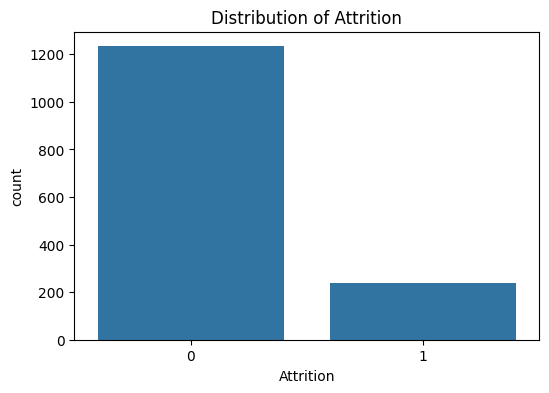

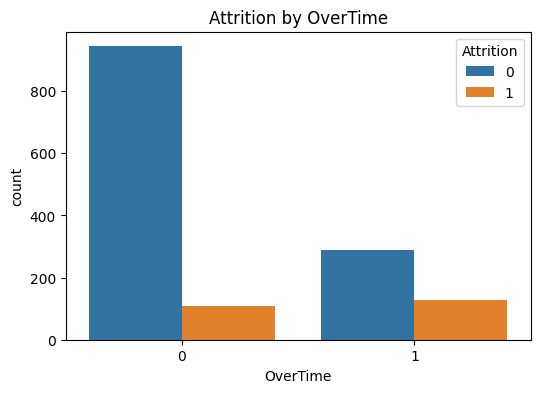

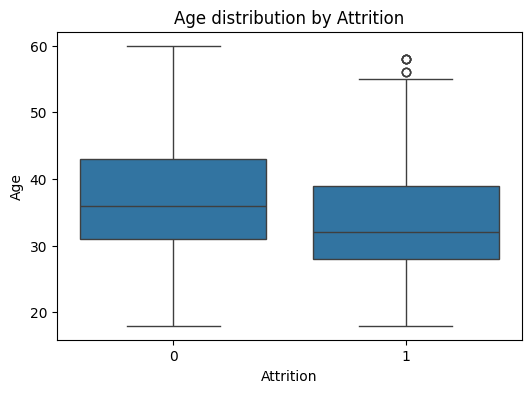

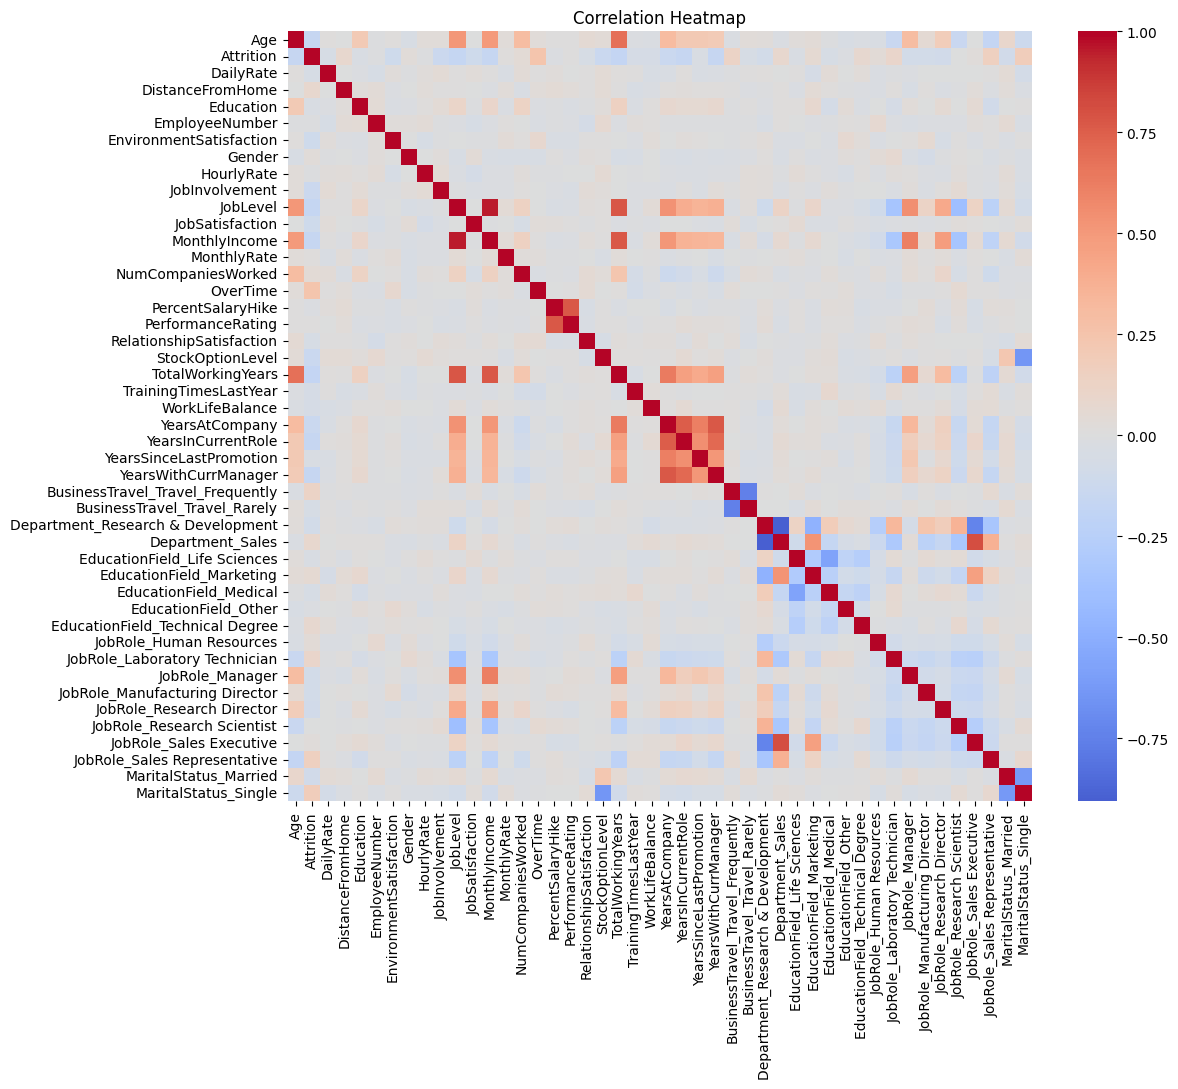

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution of Attrition
plt.figure(figsize=(6,4))
sns.countplot(x='Attrition', data=df)
plt.title('Distribution of Attrition')
plt.show()

# 2. Bar plot: OverTime vs Attrition
plt.figure(figsize=(6,4))
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title('Attrition by OverTime')
plt.show()

# 3. Boxplot: Age vs Attrition
plt.figure(figsize=(6,4))
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title('Age distribution by Attrition')
plt.show()

# 4. Heatmap of correlations
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

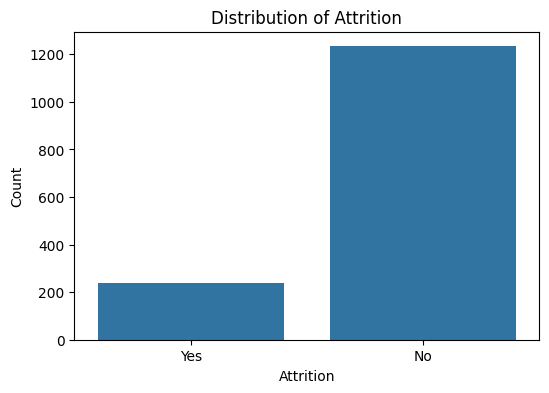

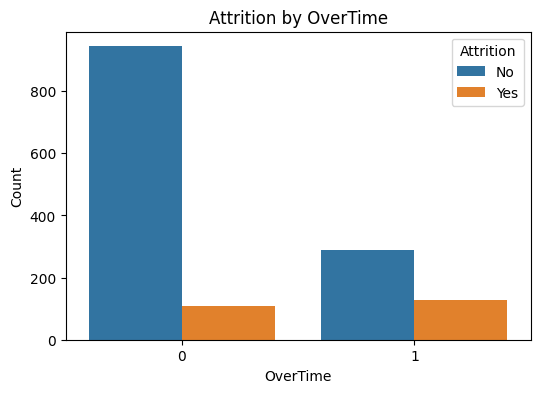

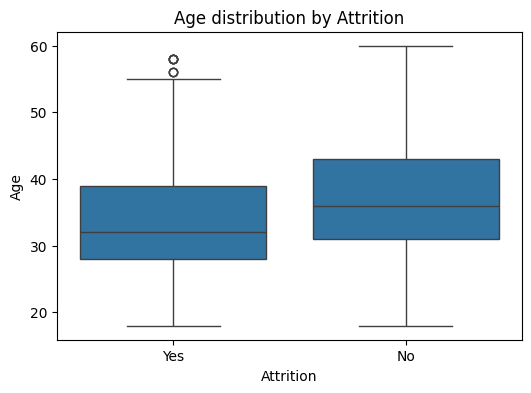

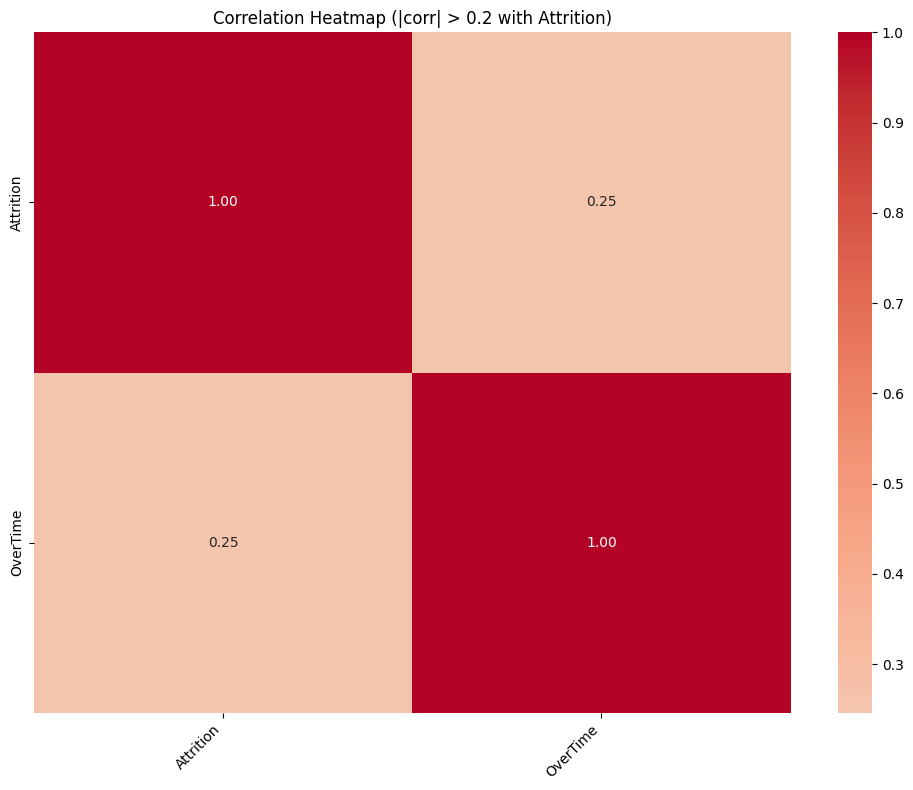

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare a copy dataframe with Attrition mapped back to Yes/No for clarity
df_viz = df.copy()
df_viz['Attrition'] = df_viz['Attrition'].map({1: 'Yes', 0: 'No'})

# 1. Distribution of Attrition with labels
plt.figure(figsize=(6,4))
sns.countplot(x='Attrition', data=df_viz)
plt.title('Distribution of Attrition')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

# 2. Bar plot: OverTime vs Attrition with labels
plt.figure(figsize=(6,4))
sns.countplot(x='OverTime', hue='Attrition', data=df_viz)
plt.title('Attrition by OverTime')
plt.xlabel('OverTime')
plt.ylabel('Count')
plt.legend(title='Attrition')
plt.show()

# 3. Boxplot: Age vs Attrition with labels
plt.figure(figsize=(6,4))
sns.boxplot(x='Attrition', y='Age', data=df_viz)
plt.title('Age distribution by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Age')
plt.show()

# 4. Heatmap for variables strongly correlated with Attrition
corr = df.corr()
# Select columns with abs correlation > 0.2 with Attrition
strong_corr_cols = corr.index[abs(corr['Attrition']) > 0.2].tolist()
plt.figure(figsize=(10,8))
sns.heatmap(corr.loc[strong_corr_cols, strong_corr_cols], annot=True, fmt=".2f", cmap='coolwarm', center=0, annot_kws={"size":10})
plt.title('Correlation Heatmap (|corr| > 0.2 with Attrition)')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [6]:
# Map OverTime back to 'Yes'/'No' for visualization
df_viz['OverTime'] = df_viz['OverTime'].map({1: 'Yes', 0: 'No'})

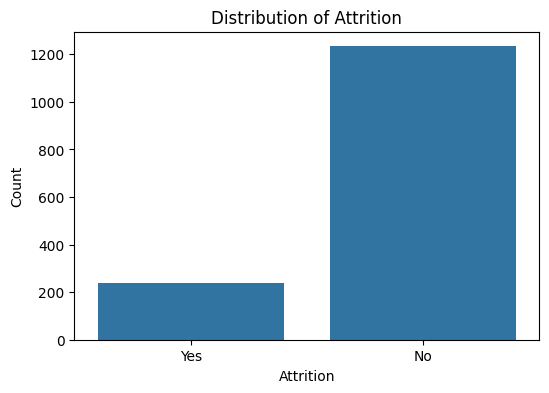

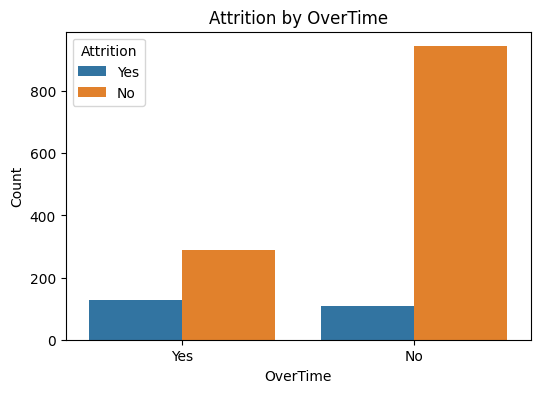

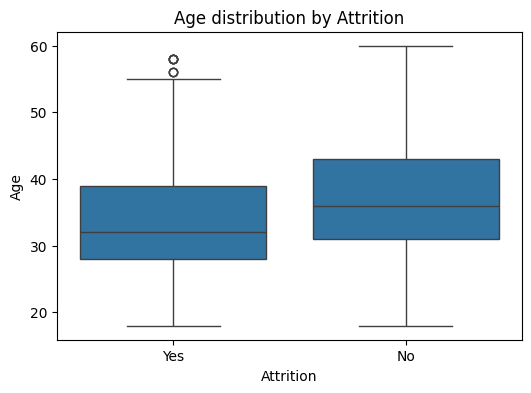

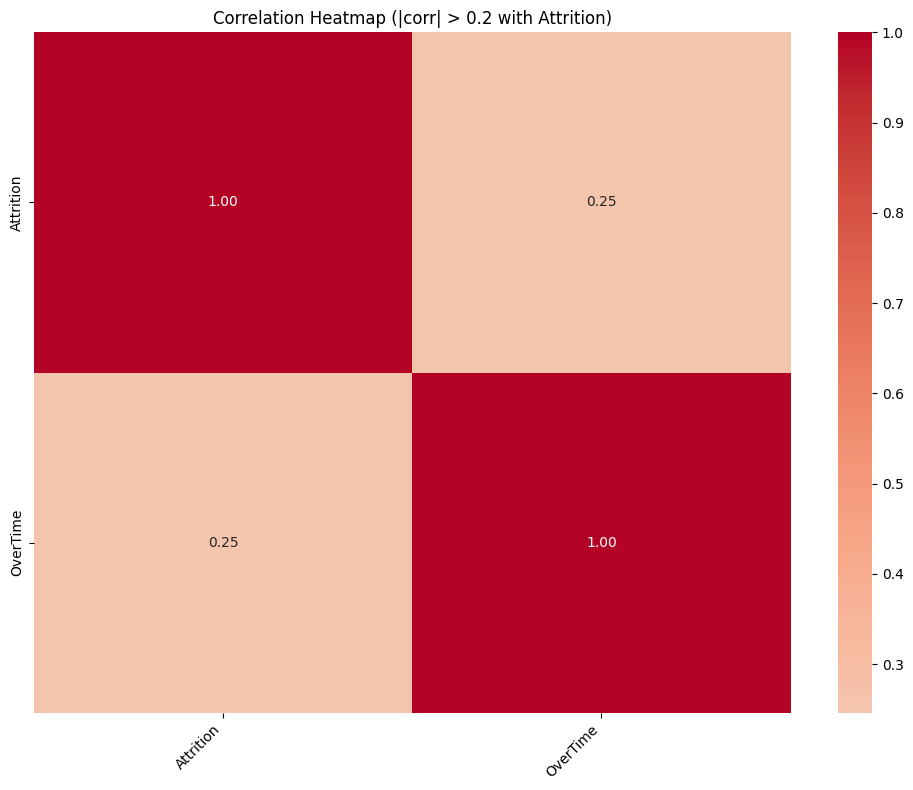

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare a copy dataframe with Attrition mapped back to Yes/No for clarity
df_viz = df.copy()
df_viz['Attrition'] = df_viz['Attrition'].map({1: 'Yes', 0: 'No'})

# Map OverTime back to 'Yes'/'No' for visualization
df_viz['OverTime'] = df_viz['OverTime'].map({1: 'Yes', 0: 'No'})

# 1. Distribution of Attrition with labels
plt.figure(figsize=(6,4))
sns.countplot(x='Attrition', data=df_viz)
plt.title('Distribution of Attrition')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

# 2. Bar plot: OverTime vs Attrition with labels
plt.figure(figsize=(6,4))
sns.countplot(x='OverTime', hue='Attrition', data=df_viz)
plt.title('Attrition by OverTime')
plt.xlabel('OverTime')
plt.ylabel('Count')
plt.legend(title='Attrition')
plt.show()

# 3. Boxplot: Age vs Attrition with labels
plt.figure(figsize=(6,4))
sns.boxplot(x='Attrition', y='Age', data=df_viz)
plt.title('Age distribution by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Age')
plt.show()

# 4. Heatmap for variables strongly correlated with Attrition
corr = df.corr()
# Select columns with abs correlation > 0.2 with Attrition
strong_corr_cols = corr.index[abs(corr['Attrition']) > 0.2].tolist()
plt.figure(figsize=(10,8))
sns.heatmap(corr.loc[strong_corr_cols, strong_corr_cols], annot=True, fmt=".2f", cmap='coolwarm', center=0, annot_kws={"size":10})
plt.title('Correlation Heatmap (|corr| > 0.2 with Attrition)')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [8]:
!pip install xgboost

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Initialize models
lr = LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
svm = SVC(probability=True, random_state=42)

models = {
    'Logistic Regression': lr,
    'Random Forest': rf,
    'XGBoost': xgb,
    'SVM': svm
}

for name, model in models.items():
    # Train
    model.fit(X_train_scaled, y_train)
    # Predict
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    print(f"Model: {name}")
    print(f" Accuracy: {acc:.4f}")
    print(f" Precision: {prec:.4f}")
    print(f" Recall: {rec:.4f}")
    print(f" F1 Score: {f1:.4f}")
    print(f" ROC AUC: {roc_auc:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 40)

NameError: name 'X_train_scaled' is not defined

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Train set shape: {X_train.shape}, Test set shape: {X_test.shape}")

Train set shape: (1176, 45), Test set shape: (294, 45)


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Initialize models
lr = LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
svm = SVC(probability=True, random_state=42)

models = {
    'Logistic Regression': lr,
    'Random Forest': rf,
    'XGBoost': xgb,
    'SVM': svm
}

for name, model in models.items():
    # Train
    model.fit(X_train_scaled, y_train)
    # Predict
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    print(f"Model: {name}")
    print(f" Accuracy: {acc:.4f}")
    print(f" Precision: {prec:.4f}")
    print(f" Recall: {rec:.4f}")
    print(f" F1 Score: {f1:.4f}")
    print(f" ROC AUC: {roc_auc:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 40)

Model: Logistic Regression
 Accuracy: 0.8605
 Precision: 0.6154
 Recall: 0.3404
 F1 Score: 0.4384
 ROC AUC: 0.8072
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.62      0.34      0.44        47

    accuracy                           0.86       294
   macro avg       0.75      0.65      0.68       294
weighted avg       0.84      0.86      0.84       294

----------------------------------------
Model: Random Forest
 Accuracy: 0.8367
 Precision: 0.4444
 Recall: 0.0851
 F1 Score: 0.1429
 ROC AUC: 0.7638
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.44      0.09      0.14        47

    accuracy                           0.84       294
   macro avg       0.65      0.53      0.53       294
weighted avg       0.78      0.84      0.79       294

----------------------------------------


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:30:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: XGBoost
 Accuracy: 0.8571
 Precision: 0.6316
 Recall: 0.2553
 F1 Score: 0.3636
 ROC AUC: 0.7554
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       247
           1       0.63      0.26      0.36        47

    accuracy                           0.86       294
   macro avg       0.75      0.61      0.64       294
weighted avg       0.83      0.86      0.83       294

----------------------------------------
Model: SVM
 Accuracy: 0.8673
 Precision: 0.9000
 Recall: 0.1915
 F1 Score: 0.3158
 ROC AUC: 0.8127
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       247
           1       0.90      0.19      0.32        47

    accuracy                           0.87       294
   macro avg       0.88      0.59      0.62       294
weighted avg       0.87      0.87      0.83       294

----------------------------------------


In [12]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, roc_auc_score

# 1. Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# 2. Setup Logistic Regression with GridSearch for hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

lr = LogisticRegression(max_iter=1000, random_state=42)
grid_search = GridSearchCV(lr, param_grid, scoring='recall', cv=5, n_jobs=-1)
grid_search.fit(X_train_smote, y_train_smote)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best recall score from CV: {grid_search.best_score_:.4f}")

# 3. Evaluate on test set
best_lr = grid_search.best_estimator_
y_pred = best_lr.predict(X_test_scaled)
y_proba = best_lr.predict_proba(X_test_scaled)[:, 1]

print(f"Test Recall: {recall_score(y_test, y_pred):.4f}")
print(f"Test Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Test F1: {f1_score(y_test, y_pred):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Test ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")

Best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best recall score from CV: 0.8235
Test Recall: 0.6596
Test Precision: 0.3974
Test F1: 0.4960
Test Accuracy: 0.7857
Test ROC AUC: 0.7841


In [13]:
import numpy as np

# Predict probabilities
y_proba = best_lr.predict_proba(X_test_scaled)[:, 1]

# Define thresholds to test
thresholds = [0.5, 0.4, 0.3, 0.25, 0.2]

for thresh in thresholds:
    y_pred_thresh = (y_proba >= thresh).astype(int)
    recall = recall_score(y_test, y_pred_thresh)
    precision = precision_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    accuracy = accuracy_score(y_test, y_pred_thresh)
    print(f"Threshold: {thresh:.2f} | Recall: {recall:.4f} | Precision: {precision:.4f} | F1: {f1:.4f} | Accuracy: {accuracy:.4f}")

Threshold: 0.50 | Recall: 0.6596 | Precision: 0.3974 | F1: 0.4960 | Accuracy: 0.7857
Threshold: 0.40 | Recall: 0.7660 | Precision: 0.3364 | F1: 0.4675 | Accuracy: 0.7211
Threshold: 0.30 | Recall: 0.7872 | Precision: 0.2937 | F1: 0.4277 | Accuracy: 0.6633
Threshold: 0.25 | Recall: 0.8085 | Precision: 0.2603 | F1: 0.3938 | Accuracy: 0.6020
Threshold: 0.20 | Recall: 0.8298 | Precision: 0.2281 | F1: 0.3578 | Accuracy: 0.5238


In [14]:
custom_threshold = 0.4
y_pred_custom = (y_proba >= custom_threshold).astype(int)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_custom))

              precision    recall  f1-score   support

           0       0.94      0.71      0.81       247
           1       0.34      0.77      0.47        47

    accuracy                           0.72       294
   macro avg       0.64      0.74      0.64       294
weighted avg       0.84      0.72      0.76       294



In [15]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm = SVC(probability=True, random_state=42)

grid_search_svm = GridSearchCV(svm, param_grid_svm, scoring='recall', cv=5, n_jobs=-1)
grid_search_svm.fit(X_train_smote, y_train_smote)

print(f"Best params SVM: {grid_search_svm.best_params_}")
print(f"Best recall CV SVM: {grid_search_svm.best_score_:.4f}")

best_svm = grid_search_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test_scaled)
y_proba_svm = best_svm.predict_proba(X_test_scaled)[:, 1]

print(f"Test Recall SVM: {recall_score(y_test, y_pred_svm):.4f}")
print(f"Test Precision SVM: {precision_score(y_test, y_pred_svm):.4f}")
print(f"Test F1 SVM: {f1_score(y_test, y_pred_svm):.4f}")
print(f"Test Accuracy SVM: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Test ROC AUC SVM: {roc_auc_score(y_test, y_proba_svm):.4f}")

Best params SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best recall CV SVM: 0.9898
Test Recall SVM: 0.3191
Test Precision SVM: 0.4545
Test F1 SVM: 0.3750
Test Accuracy SVM: 0.8299
Test ROC AUC SVM: 0.7114


In [16]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, roc_auc_score

# 1. Original SMOTE (έχουμε ήδη τρέξει, αλλά για πληρότητα)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

lr_smote = LogisticRegression(max_iter=1000, random_state=42)
lr_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = lr_smote.predict(X_test_scaled)
y_proba_smote = lr_smote.predict_proba(X_test_scaled)[:, 1]

print("SMOTE:")
print(f"Recall: {recall_score(y_test, y_pred_smote):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_smote):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_smote):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_smote):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba_smote):.4f}")
print("-"*40)

# 2. Random Undersampling
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train_scaled, y_train)

lr_rus = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
lr_rus.fit(X_train_rus, y_train_rus)
y_pred_rus = lr_rus.predict(X_test_scaled)
y_proba_rus = lr_rus.predict_proba(X_test_scaled)[:, 1]

print("Random Undersampling:")
print(f"Recall: {recall_score(y_test, y_pred_rus):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rus):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rus):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rus):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba_rus):.4f}")
print("-"*40)

# 3. SMOTEENN (SMOTE + Edited Nearest Neighbors)
smoteenn = SMOTEENN(random_state=42)
X_train_smoteenn, y_train_smoteenn = smoteenn.fit_resample(X_train_scaled, y_train)

lr_smoteenn = LogisticRegression(max_iter=1000, random_state=42)
lr_smoteenn.fit(X_train_smoteenn, y_train_smoteenn)
y_pred_smoteenn = lr_smoteenn.predict(X_test_scaled)
y_proba_smoteenn = lr_smoteenn.predict_proba(X_test_scaled)[:, 1]

print("SMOTEENN:")
print(f"Recall: {recall_score(y_test, y_pred_smoteenn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_smoteenn):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_smoteenn):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_smoteenn):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba_smoteenn):.4f}")
print("-"*40)

# 4. SMOTETomek (SMOTE + Tomek links)
smotetomek = SMOTETomek(random_state=42)
X_train_smotetomek, y_train_smotetomek = smotetomek.fit_resample(X_train_scaled, y_train)

lr_smotetomek = LogisticRegression(max_iter=1000, random_state=42)
lr_smotetomek.fit(X_train_smotetomek, y_train_smotetomek)
y_pred_smotetomek = lr_smotetomek.predict(X_test_scaled)
y_proba_smotetomek = lr_smotetomek.predict_proba(X_test_scaled)[:, 1]

print("SMOTETomek:")
print(f"Recall: {recall_score(y_test, y_pred_smotetomek):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_smotetomek):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_smotetomek):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_smotetomek):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba_smotetomek):.4f}")
print("-"*40)

SMOTE:
Recall: 0.6170
Precision: 0.3671
F1 Score: 0.4603
Accuracy: 0.7687
ROC AUC: 0.7811
----------------------------------------
Random Undersampling:
Recall: 0.6596
Precision: 0.3298
F1 Score: 0.4397
Accuracy: 0.7313
ROC AUC: 0.7784
----------------------------------------
SMOTEENN:
Recall: 0.8085
Precision: 0.2695
F1 Score: 0.4043
Accuracy: 0.6190
ROC AUC: 0.7733
----------------------------------------
SMOTETomek:
Recall: 0.6170
Precision: 0.3671
F1 Score: 0.4603
Accuracy: 0.7687
ROC AUC: 0.7811
----------------------------------------


In [17]:
from imblearn.combine import SMOTEENN
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, roc_auc_score

# 1. Apply SMOTEENN
smoteenn = SMOTEENN(random_state=42)
X_train_smoteenn, y_train_smoteenn = smoteenn.fit_resample(X_train_scaled, y_train)

# 2. Parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.7, 1]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# 3. GridSearchCV with recall scoring
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, scoring='recall', cv=5, n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train_smoteenn, y_train_smoteenn)

print(f"Best params XGB with SMOTEENN: {grid_search_xgb.best_params_}")
print(f"Best recall CV XGB with SMOTEENN: {grid_search_xgb.best_score_:.4f}")

# 4. Evaluate best model on test set
best_xgb = grid_search_xgb.best_estimator_
y_pred = best_xgb.predict(X_test_scaled)
y_proba = best_xgb.predict_proba(X_test_scaled)[:, 1]

print(f"Test Recall: {recall_score(y_test, y_pred):.4f}")
print(f"Test Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Test F1: {f1_score(y_test, y_pred):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Test ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:43:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best params XGB with SMOTEENN: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.7}
Best recall CV XGB with SMOTEENN: 0.9804
Test Recall: 0.8085
Test Precision: 0.2754
Test F1: 0.4108
Test Accuracy: 0.6293
Test ROC AUC: 0.7763


<Figure size 1200x800 with 0 Axes>

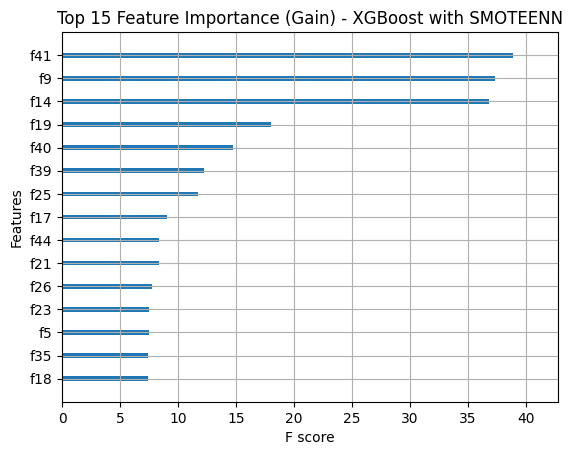

In [18]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Το εκπαιδευμένο μοντέλο best_xgb είναι από το tuning με SMOTEENN
plt.figure(figsize=(12,8))
plot_importance(best_xgb, max_num_features=15, importance_type='gain', show_values=False)
plt.title('Top 15 Feature Importance (Gain) - XGBoost with SMOTEENN')
plt.show()

In [19]:
import pandas as pd

# Get feature importance scores as dictionary {feature_name: importance}
importance_dict = best_xgb.get_booster().get_score(importance_type='gain')

# Convert to dataframe for sorting and display
importance_df = pd.DataFrame(list(importance_dict.items()), columns=['Feature', 'Gain'])
importance_df = importance_df.sort_values(by='Gain', ascending=False).reset_index(drop=True)

# Show top 15 features
print(importance_df.head(15))

# Save to CSV for χρήση σε README / παρουσίαση
importance_df.head(15).to_csv('top15_feature_importance.csv', index=False)

   Feature       Gain
0      f41  38.903019
1       f9  37.366119
2      f14  36.850647
3      f19  18.048899
4      f40  14.726855
5      f39  12.222171
6      f25  11.754494
7      f17   9.088124
8      f44   8.400187
9      f21   8.378826
10     f26   7.750669
11     f23   7.523864
12      f5   7.480681
13     f35   7.431732
14     f18   7.399325


In [20]:
# Get feature names as list
feature_names = list(df.drop('Attrition', axis=1).columns)

# Map f0, f1,... to actual feature names
# XGBoost ονομάζει f0 την πρώτη στήλη, f1 τη δεύτερη κτλ.

# Δημιουργία λεξικού αντιστοιχίας
feature_map = {f'f{i}': name for i, name in enumerate(feature_names)}

# Αντικατάσταση f* με πραγματικά ονόματα στο dataframe importance_df
importance_df['Feature'] = importance_df['Feature'].map(feature_map)

print(importance_df.head(15))

                             Feature       Gain
0            JobRole_Sales Executive  38.903019
1                           JobLevel  37.366119
2                           OverTime  36.850647
3                  TotalWorkingYears  18.048899
4         JobRole_Research Scientist  14.726855
5          JobRole_Research Director  12.222171
6               YearsWithCurrManager  11.754494
7           RelationshipSatisfaction   9.088124
8               MaritalStatus_Single   8.400187
9                    WorkLifeBalance   8.378826
10  BusinessTravel_Travel_Frequently   7.750669
11                YearsInCurrentRole   7.523864
12           EnvironmentSatisfaction   7.480681
13           JobRole_Human Resources   7.431732
14                  StockOptionLevel   7.399325


                             Feature  Coefficient
14                          OverTime     0.826797
19                 TotalWorkingYears    -0.608266
26  BusinessTravel_Travel_Frequently     0.600275
36     JobRole_Laboratory Technician     0.593551
25              YearsWithCurrManager    -0.475757
13                NumCompaniesWorked     0.459270
39         JobRole_Research Director    -0.457264
24           YearsSinceLastPromotion     0.448294
5            EnvironmentSatisfaction    -0.440205
10                   JobSatisfaction    -0.394922
27      BusinessTravel_Travel_Rarely     0.391717
33              EducationField_Other    -0.389325
44              MaritalStatus_Single     0.374521
42      JobRole_Sales Representative     0.358572
0                                Age    -0.342864


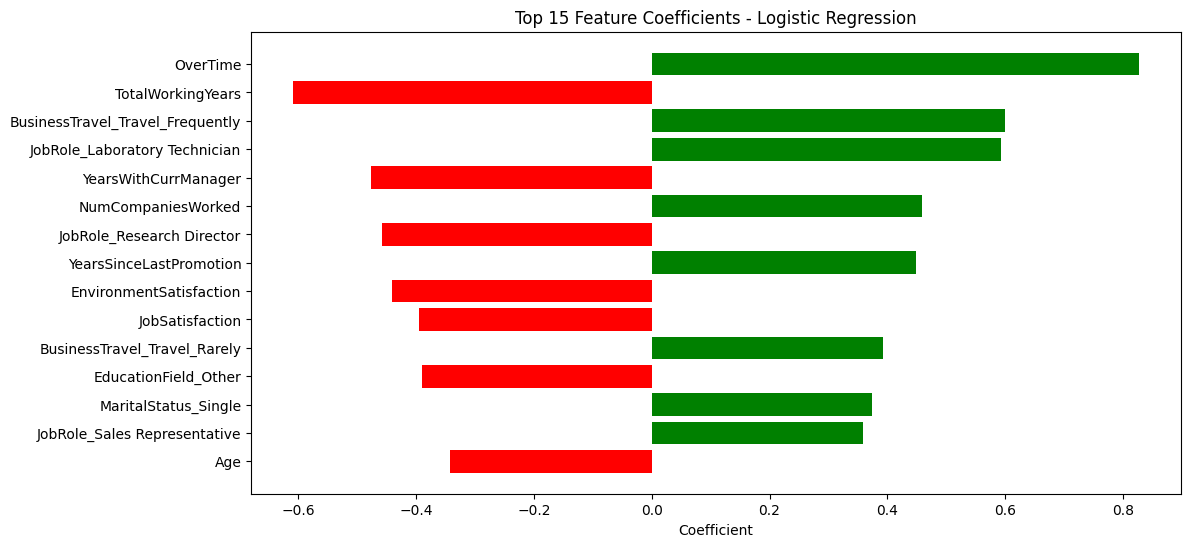

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Παίρνουμε τους συντελεστές του logistic regression (best_lr από tuning με SMOTEENN)
coefficients = best_lr.coef_[0]
features = df.drop('Attrition', axis=1).columns

# Δημιουργία dataframe με features και coefficients
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

# Ταξινόμηση κατά απόλυτη τιμή του coefficient
coef_df['abs_coef'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='abs_coef', ascending=False).head(15)

# Εμφάνιση
print(coef_df[['Feature', 'Coefficient']])

# Οπτικοποίηση
plt.figure(figsize=(12,6))
colors = coef_df['Coefficient'].apply(lambda x: 'green' if x > 0 else 'red')
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color=colors)
plt.xlabel('Coefficient')
plt.title('Top 15 Feature Coefficients - Logistic Regression')
plt.gca().invert_yaxis()
plt.show()

                     Feature  Importance
14                  OverTime    0.081010
11             MonthlyIncome    0.063425
9                   JobLevel    0.060162
19         TotalWorkingYears    0.044335
25      YearsWithCurrManager    0.044295
18          StockOptionLevel    0.043187
23        YearsInCurrentRole    0.040655
10           JobSatisfaction    0.035951
13        NumCompaniesWorked    0.033688
0                        Age    0.032341
5    EnvironmentSatisfaction    0.032101
22            YearsAtCompany    0.031361
17  RelationshipSatisfaction    0.026711
2           DistanceFromHome    0.026138
4             EmployeeNumber    0.025981


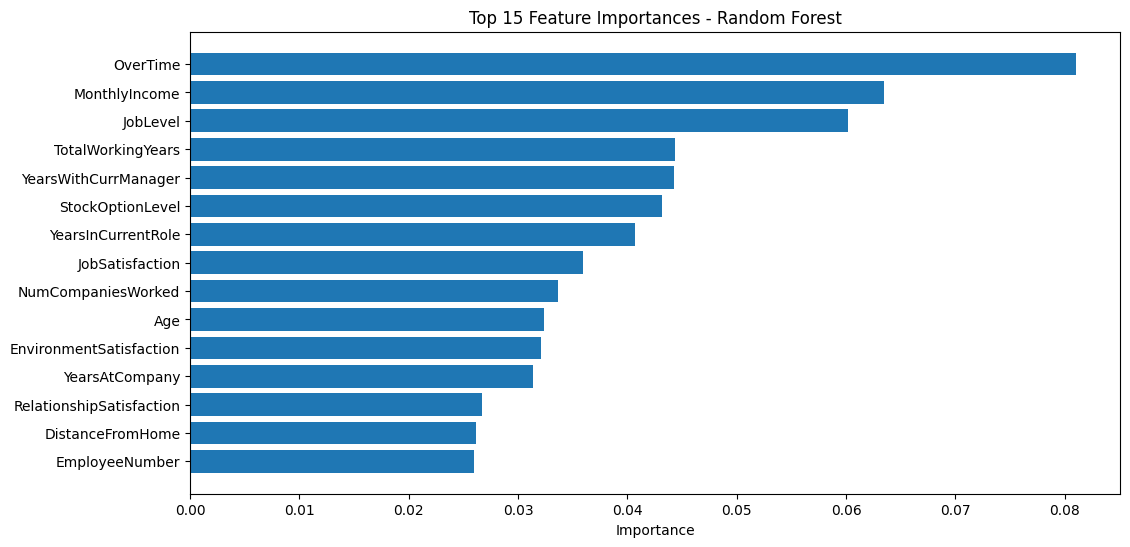

In [22]:
# best_rf από εκπαίδευση με SMOTEENN (αν δεν το έχεις, κάνε train ξανά με SMOTEENN dataset)
from sklearn.ensemble import RandomForestClassifier

# Για παράδειγμα, εκπαιδεύουμε πάλι:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_smoteenn, y_train_smoteenn)

importances = rf.feature_importances_
features = df.drop('Attrition', axis=1).columns

rf_imp_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(15)

print(rf_imp_df)

# Οπτικοποίηση
plt.figure(figsize=(12,6))
plt.barh(rf_imp_df['Feature'], rf_imp_df['Importance'])
plt.xlabel('Importance')
plt.title('Top 15 Feature Importances - Random Forest')
plt.gca().invert_yaxis()
plt.show()

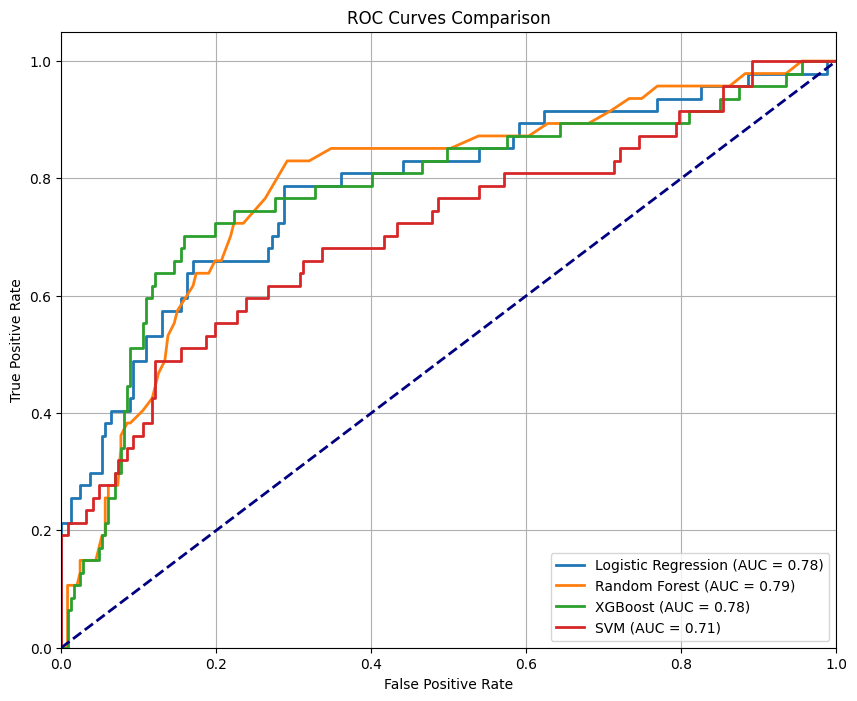

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Λίστα μοντέλων και ονομάτων (χρησιμοποιούμε τα tuned μοντέλα)
models = {
    'Logistic Regression': best_lr,
    'Random Forest': rf,
    'XGBoost': best_xgb,
    'SVM': best_svm
}

plt.figure(figsize=(10,8))

for name, model in models.items():
    # Υπολογισμός probabilities
    y_proba = model.predict_proba(X_test_scaled)[:,1]
    # Υπολογισμός ROC curve και AUC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Τυπικά στοιχεία γραφήματος
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()